In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import glob
import os

from PIL import Image
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.utils import timeseries_dataset_from_array
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation, AveragePooling2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, RandomWidth, RandomHeight, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.layers import SeparableConv2D, add, GlobalAveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.regularizers import l2
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers
from scipy.signal import resample

__<H1>Data Collection &#11088;<H1>__

In [2]:
!pip install gdown

In [5]:
import shutil
baseDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2"
os.mkdir(baseDir)

trainDir = os.path.join(baseDir, 'train')
os.mkdir(trainDir)

validationDir = os.path.join(baseDir, 'validation')
os.mkdir(validationDir)

testDir = os.path.join(baseDir, 'test')
os.mkdir(testDir)

trainHumanDir = os.path.join(trainDir, 'Human')
os.mkdir(trainHumanDir)

trainAIDir = os.path.join(trainDir, 'AI')
os.mkdir(trainAIDir)

validationHumanDir = os.path.join(validationDir, 'Human')
os.mkdir(validationHumanDir)

validationAIDir = os.path.join(validationDir, 'AI')
os.mkdir(validationAIDir)

testHumanDir = os.path.join(testDir, 'Human')
os.mkdir(testHumanDir)

testAIDir = os.path.join(testDir, 'AI')
os.mkdir(testAIDir)

print("Finished create file to receive all data !!")

Finished create file to receive all data !!


__<h2>👻 Copies data to each file 👻</h2>__

In [3]:
HumanDataDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human Picture Ver.4/"
AIDataDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/AI Picture Ver.4/"

In [7]:
AIFile = [f for f in os.listdir(AIDataDir) if f.endswith('.png')]

# Iterate through the shuffled files and rename them
for i, filename in enumerate(AIFile):
    new_filename = f'AI{i+1}.png'
    os.rename(os.path.join(AIDataDir, filename), os.path.join(AIDataDir, new_filename))

In [8]:
HumanFile = [f for f in os.listdir(HumanDataDir) if f.endswith('.png')]

# Iterate through the shuffled files and rename them
for i, filename in enumerate(HumanFile):
    new_filename = f'Human{i+1}.png'
    os.rename(os.path.join(HumanDataDir, filename), os.path.join(HumanDataDir, new_filename))

In [9]:
# Copies AI voice Spectrogram 

fnames = ['AI{}.png'.format(i+1) for i in range(1200)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(trainAIDir, fname)
  shutil.copyfile(src, dst)


fnames = ['AI{}.png'.format(i+1) for i in range(1200, 1600)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(validationAIDir, fname)
  shutil.copyfile(src, dst)


fnames = ['AI{}.png'.format(i+1) for i in range(1600, 2000)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(testAIDir, fname)
  shutil.copyfile(src, dst)


# Copies Human voice Spectrogram 
  
fnames = ['Human{}.png'.format(i+1) for i in range(1200)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(trainHumanDir, fname)
  shutil.copyfile(src, dst)


fnames = ['Human{}.png'.format(i+1) for i in range(1200, 1600)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(validationHumanDir, fname)
  shutil.copyfile(src, dst)


fnames = ['Human{}.png'.format(i+1) for i in range(1600, 2000)]
for fname in fnames:
  src = os.path.join(HumanDataDir, fname)
  dst = os.path.join(testHumanDir, fname)
  shutil.copyfile(src, dst)

In [56]:
maleDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/dataTest/maleDataPic"
femaleDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/dataTest/femaleDataPic"

In [57]:
maleAIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/dataTest/maleDataPic/AI"
maleHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/dataTest/maleDataPic/Human"
femaleAIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/dataTest/femaleDataPic/AI"
femaleHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/dataTest/femaleDataPic/Human"

In [102]:
DemoDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/Demo"
DemoAIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/Demo/AIPic"
DemoHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/Demo/HumanPic"

In [58]:
trainDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2/train"
validationDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2/validation"
testDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2/test"
trainHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2/train/Human"
trainAIDir ="C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2/train/AI"
validationAIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2/validation/AI"
validationHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2/validation/Human"
testHumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2/test/Human"
testAIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/data2/test/AI"

In [103]:
print('total training AI voice images:', len(os.listdir(trainAIDir)))
print('total training Human voice images:', len(os.listdir(trainHumanDir)))
print('total validation AI voice images:', len(os.listdir(validationAIDir)))
print('total validation Human voice images:', len(os.listdir(validationHumanDir)))
print('total test AI voice images:', len(os.listdir(testAIDir)))
print('total test Human voice images:', len(os.listdir(testHumanDir)))
print('total male AI voice images:', len(os.listdir(maleAIDir)))
print('total male Human voice images:', len(os.listdir(maleHumanDir)))
print('total female AI voice images:', len(os.listdir(femaleAIDir)))
print('total female Human voice images:', len(os.listdir(femaleHumanDir)))
print('total Demo AI voice images:', len(os.listdir(DemoAIDir)))
print('total Demo Human voice images:', len(os.listdir(DemoHumanDir)))

total training AI voice images: 1200
total training Human voice images: 1200
total validation AI voice images: 400
total validation Human voice images: 400
total test AI voice images: 400
total test Human voice images: 400
total male AI voice images: 200
total male Human voice images: 200
total female AI voice images: 200
total female Human voice images: 272
total Demo AI voice images: 2
total Demo Human voice images: 2


In [104]:
trainSet = image_dataset_from_directory(
    trainDir,
    image_size = (224,224),
    batch_size = 32
)
valSet = image_dataset_from_directory(
    validationDir,
    image_size = (224,224),
    batch_size = 32
)
testSet = image_dataset_from_directory(
    testDir,
    image_size = (224,224),
    batch_size = 32
)

maleSet = image_dataset_from_directory(
    maleDir,
    image_size = (224,224),
    batch_size = 32
)

femaleSet = image_dataset_from_directory(
    femaleDir,
    image_size = (224,224),
    batch_size = 32
)

DemoSet = image_dataset_from_directory(
    DemoDir,
    image_size = (224,224),
    batch_size = 32
)

Found 2400 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 400 files belonging to 2 classes.
Found 472 files belonging to 2 classes.
Found 4 files belonging to 2 classes.


In [7]:
classLabel = trainSet.class_names

for label, className in enumerate(classLabel):
    print("class: {} --> {}".format(className, label))

class: AI --> 0
class: Human --> 1


In [8]:
for data_batch, labels_batch in trainSet.take(1):
  print("data batch shape", data_batch.shape) # 64 224x224 3 c channels
  print("label batch shape", labels_batch.shape)
  print("labels_batch", labels_batch) # 0 AI, 1 Human

data batch shape (32, 224, 224, 3)
label batch shape (32,)
labels_batch tf.Tensor([1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0], shape=(32,), dtype=int32)


__<h2>Call Back 👹</h2>__

In [34]:
early_stopping_cb = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint_cb1 = ModelCheckpoint('model_scratch/woaugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb2 = ModelCheckpoint('model_scratch/waugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb3 = ModelCheckpoint('model_feature_extraction/woaugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb4 = ModelCheckpoint('model_feature_extraction/waugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb5 = ModelCheckpoint('model_fine_tuning/woaugment', monitor='val_loss',save_best_only=True,save_weights_only=True)
model_checkpoint_cb6 = ModelCheckpoint('model_fine_tuning/waugment', monitor='val_loss',save_best_only=True,save_weights_only=True)
reduce_lr_cb = ReduceLROnPlateau(min_lr=0.001)

__<h2>Build Model 🫠</h2>__

__<h4>Let's Try Train from scratch</h4>__

In [18]:
def build_model_scratch():
  model = Sequential()
  model.add(Input((224,224,3)))
  # model.add(data_augmentation) 
  model.add(Rescaling(1./255)) # normalize colors pixcel from 0 = black, 255 = white --> length 0-1
  
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  # model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))

  # model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))

  # model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))
  
  # model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [17]:
model = build_model_scratch()
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999),
                loss='binary_crossentropy',
                metrics=['accuracy'])

history = model.fit(trainSet, epochs=10, validation_data=valSet, verbose=1,
                    callbacks=[early_stopping_cb,model_checkpoint_cb2,reduce_lr_cb])

# history = model.fit(trainSet, epochs=10, validation_data=valSet, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                     

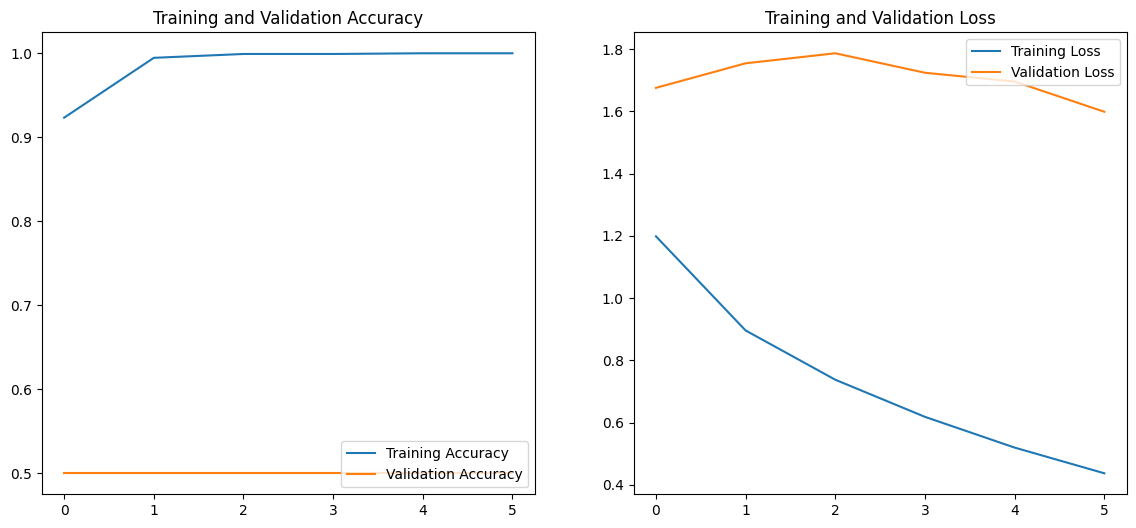

In [18]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

In [19]:
# test set
loss, acc = model.evaluate(testSet)
print('test_oss:', loss)
print('test_acc:', acc)

13/13 [==============================] - 9s 533ms/step - loss: 1.6799 - accuracy: 0.5000
test_oss: 1.6798691749572754
test_acc: 0.5


In [77]:
def build_model_scratch2():
  model = Sequential()
  model.add(Input((224,224,3)))
  model.add(Rescaling(1./255)) # normalize colors pixcel from 0 = black, 255 = white --> length 0-1
  
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', kernel_regularizer=l2(0.001)))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.001))) # --> change to LeakyReLU
  model.add(BatchNormalization())
  model.add(Dropout(0.6))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [78]:
model = build_model_scratch2()
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999),
                loss='binary_crossentropy',
                metrics=['accuracy'])

history = model.fit(trainSet, epochs=10, validation_data=valSet, verbose=1,
                    callbacks=[early_stopping_cb,model_checkpoint_cb2,reduce_lr_cb])

# history = model.fit(trainSet, epochs=10, validation_data=valSet, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 flatten_1 (Flatten)         (None, 401408)           

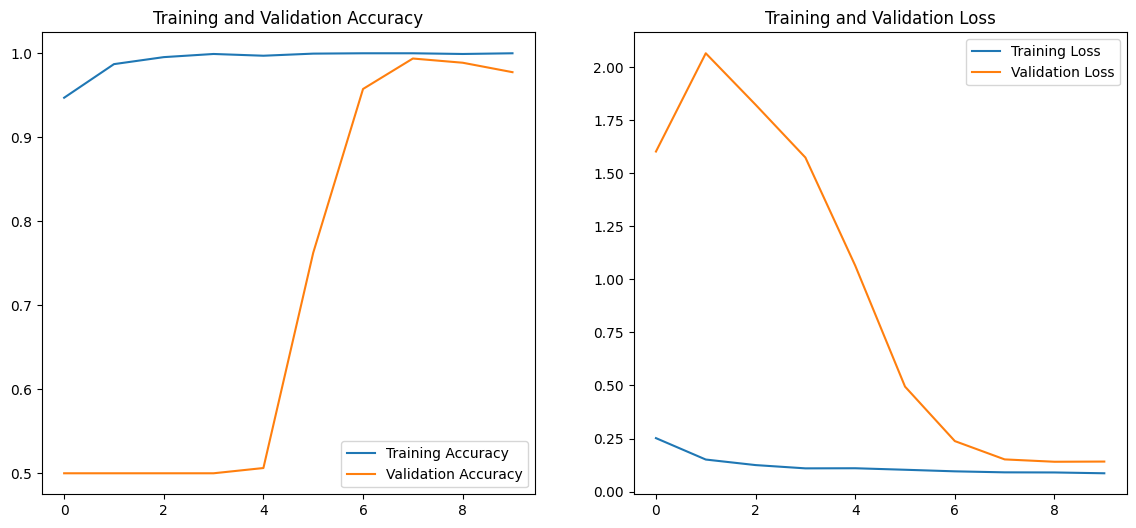

In [79]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

In [31]:
# test set
loss, acc = model.evaluate(testSet)
print('test_oss:', loss)
print('test_acc:', acc)

25/25 [==============================] - 5s 173ms/step - loss: 0.3541 - accuracy: 0.8838
test_oss: 0.3540739417076111
test_acc: 0.8837500214576721


In [12]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [20]:
import kerastuner as kt
from tensorflow import keras
from keras_tuner import BayesianOptimization

C:\Users\jeant\AppData\Local\Temp\ipykernel_28528\1895665112.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [21]:
def build_model_scratch_RandomSearch(hp):
    model = Sequential()
    model.add(Rescaling(1./255))
    model.add(Conv2D(
            filters=hp.Int('conv_filters', min_value=32, max_value=256, step=32),
            kernel_size=hp.Choice('conv_kernel_size', values=[3, 5]),
            activation='relu',
            input_shape=(224, 224, 3),
            kernel_regularizer=l2(0.001) 
        ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu',
            kernel_regularizer=l2(0.001)
        ))
    model.add(Dense(1, activation='sigmoid'))
    
  
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  
    return model

In [19]:
tuner = BayesianOptimization(
    build_model_scratch_RandomSearch,
    objective='val_accuracy',
    max_trials=10,  # Adjust based on computational resources
    executions_per_trial=3,  # How many models to train for each trial
)

# Start the search for the best hyperparameter configuration.
tuner.search(trainSet, epochs=10, validation_data=valSet, callbacks=[early_stopping_cb])

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Display the model's architecture
best_model.summary()

Trial 4 Complete [01h 08m 04s]
val_accuracy: 0.9470833341280619

Best val_accuracy So Far: 0.95291668176651
Total elapsed time: 08h 04m 46s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
256               |64                |conv_filters
5                 |5                 |conv_kernel_size
128               |96                |dense_units
0.00022866        |0.00061208        |learning_rate

Epoch 1/10
 2/75 [..............................] - ETA: 43:53 - loss: 28.0832 - accuracy: 0.5781 

In [22]:
def build_model_scratch_RandomSearch2(hp):
    model = Sequential()
    model.add(Rescaling(1./255))
    model.add(Conv2D(
            filters=hp.Int('conv_filters', min_value=32, max_value=256, step=32),
            kernel_size=hp.Choice('conv_kernel_size', values=[3, 5]),
            activation='relu',
            input_shape=(224, 224, 3),
            kernel_regularizer=l2(0.001) 
        ))
    model.add(MaxPooling2D(pool_size=hp.Choice('pool_size', values =[2, 4])))
    model.add(BatchNormalization())
    model.add(Dropout(0.6))
    model.add(Flatten())
    model.add(Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu',
            kernel_regularizer=l2(0.001)
        ))
    model.add(Dropout(0.6))
    model.add(Dense(1, activation='sigmoid'))
    
  
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  
    return model

In [17]:
tuner = BayesianOptimization(
    build_model_scratch_RandomSearch2,
    objective='val_accuracy',
    max_trials=5,  # Adjust based on computational resources
    executions_per_trial=2,  # How many models to train for each trial
)

# Start the search for the best hyperparameter configuration.
tuner.search(trainSet, epochs=10, validation_data=valSet)
# tuner.search(trainSet, epochs=10, validation_data=valSet, callbacks=[early_stopping_cb])

Trial 5 Complete [02h 05m 05s]
val_accuracy: 0.9518750011920929

Best val_accuracy So Far: 0.9518750011920929
Total elapsed time: 07h 12m 24s


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [30]:
tuner = BayesianOptimization(
    build_model_scratch_RandomSearch2,
    objective='val_accuracy',
    max_trials=5,  # Adjust based on computational resources
    executions_per_trial=2,  # How many models to train for each trial
)

Reloading Tuner from .\untitled_project\tuner0.json


In [31]:
best_hps = tuner.get_best_hyperparameters()[0]

# Re-build the model with the best hyperparameters
best_model = build_model_scratch_RandomSearch2(best_hps)

best_model.build((None, 224, 224, 3))  # `None` is for the batch size which can be variable

best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 256)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 55, 55, 256)       1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 55, 55, 256)       0         
                                                                 
 flatten (Flatten)           (None, 774400)            0

In [32]:
for hyperparameter in ['conv_filters', 'conv_kernel_size', 'dense_units', 'learning_rate']:
    print(f"{hyperparameter}: {best_hps.get(hyperparameter)}")

conv_filters: 256
conv_kernel_size: 3
dense_units: 128
learning_rate: 0.0007022578158084675


In [35]:
history_tuning = best_model.fit(trainSet, epochs=10, validation_data=valSet, verbose=1,
                    callbacks=[early_stopping_cb,model_checkpoint_cb2,reduce_lr_cb])

Epoch 1/10


75/75 [==============================] - 265s 3s/step - loss: 2.5364 - accuracy: 0.9408 - val_loss: 2.1944 - val_accuracy: 0.6988 - lr: 7.0226e-04
Epoch 2/10
75/75 [==============================] - 257s 3s/step - loss: 1.4385 - accuracy: 0.9942 - val_loss: 1.4947 - val_accuracy: 0.9200 - lr: 7.0226e-04
Epoch 3/10
75/75 [==============================] - 253s 3s/step - loss: 1.1120 - accuracy: 0.9975 - val_loss: 1.1787 - val_accuracy: 0.9212 - lr: 7.0226e-04
Epoch 4/10
75/75 [==============================] - 258s 3s/step - loss: 0.9600 - accuracy: 0.9946 - val_loss: 1.0299 - val_accuracy: 0.9375 - lr: 7.0226e-04
Epoch 5/10
75/75 [==============================] - 256s 3s/step - loss: 0.8287 - accuracy: 0.9954 - val_loss: 0.9571 - val_accuracy: 0.9150 - lr: 7.0226e-04
Epoch 6/10
75/75 [==============================] - 248s 3s/step - loss: 0.8892 - accuracy: 0.9871 - val_loss: 1.3954 - val_accuracy: 0.8575 - lr: 7.0226e-04
Epoch 7/10
75/75 [==============================] - 245s 3s/ste

In [89]:
loss, acc = best_model.evaluate(testSet)
print('test_acc:', acc)

25/25 [==============================] - 18s 709ms/step - loss: 4.5464 - accuracy: 0.7387
test_acc: 0.7387499809265137


In [85]:
loss, acc = model.evaluate(maleSet)
print('test_acc:', acc)

13/13 [==============================] - 3s 146ms/step - loss: 0.1628 - accuracy: 0.9625
test_acc: 0.9624999761581421


In [88]:
loss, acc = best_model.evaluate(femaleSet)
print('test_acc:', acc)

13/13 [==============================] - 11s 749ms/step - loss: 1.1666 - accuracy: 0.9625
test_acc: 0.9624999761581421


In [47]:
predictions = best_model.predict(testSet)
acClass = []
for x, labels in testSet:
    acClass.extend(labels)

for i in range(len(predictions)):
    predicted_class = np.argmax(predictions[i])
    actual_class = acClass[i]
    probability_scores = predictions[i]

25/25 [==============================] - 17s 645ms/step


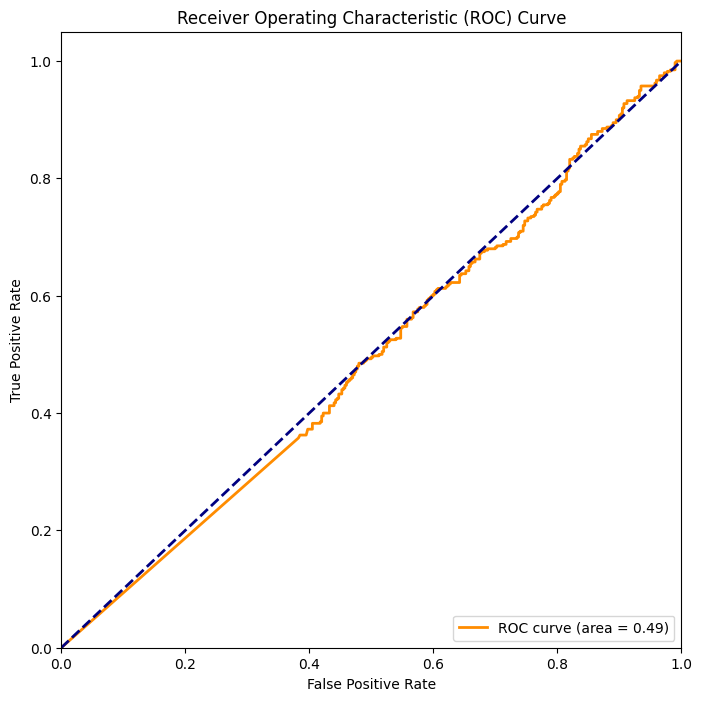

In [40]:
fpr, tpr, _ = roc_curve(acClass, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [81]:
test_predictions = []
test_labels = []

for images, labels in testSet:
    batch_predictions = model.predict(images)
    batch_predictions = (batch_predictions > 0.5).astype('int32')
    test_predictions.extend(batch_predictions)
    test_labels.extend(labels.numpy())

test_predictions = np.array(test_predictions)
test_labels = np.array(test_labels)

1/1 [==============================] - 0s 125ms/step


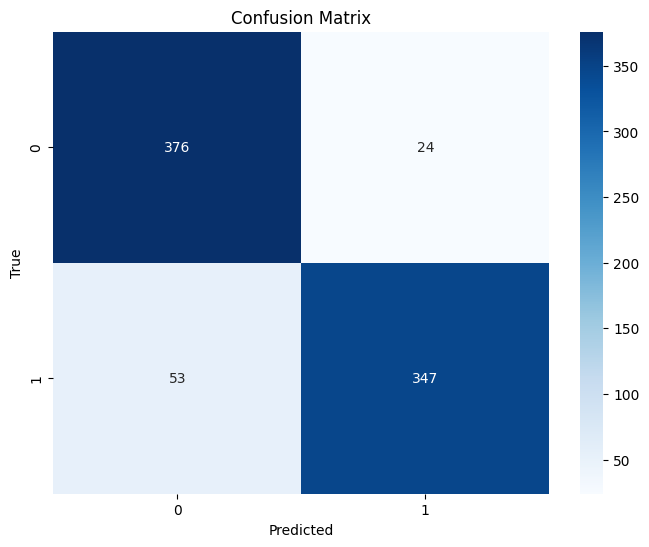

In [82]:
cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [59]:
report = classification_report(test_labels, test_predictions, target_names=['Human', 'AI'], digits=4)

print(report)

              precision    recall  f1-score   support

       Human     0.7908    0.6425    0.7090       400
          AI     0.6989    0.8300    0.7589       400

    accuracy                         0.7362       800
   macro avg     0.7449    0.7362    0.7339       800
weighted avg     0.7449    0.7362    0.7339       800



In [83]:
test_predictions = []
test_labels = []

for images, labels in maleSet:
    batch_predictions = model.predict(images)
    batch_predictions = (batch_predictions > 0.3).astype('int32')
    test_predictions.extend(batch_predictions)
    test_labels.extend(labels.numpy())

test_predictions = np.array(test_predictions)
test_labels = np.array(test_labels)

1/1 [==============================] - 0s 147ms/step


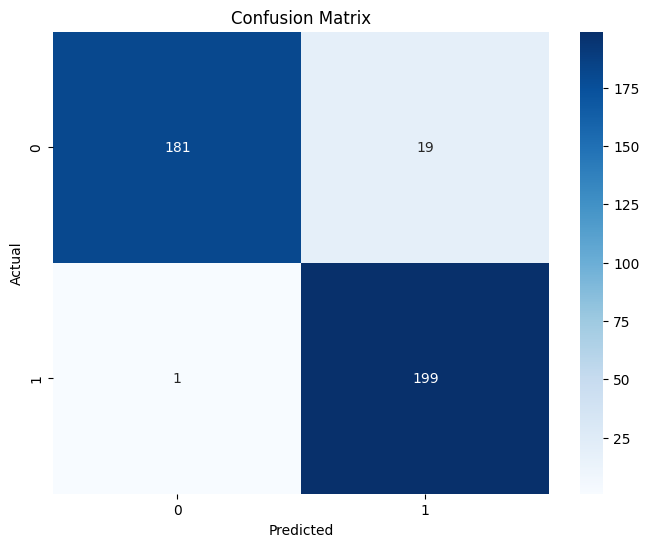

In [84]:
cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [93]:
test_predictions = []
test_labels = []

for images, labels in femaleSet:
    batch_predictions = best_model.predict(images)
    batch_predictions = (batch_predictions > 0.5).astype('int32')
    test_predictions.extend(batch_predictions)
    test_labels.extend(labels.numpy())

test_predictions = np.array(test_predictions)
test_labels = np.array(test_labels)

1/1 [==============================] - 0s 318ms/step


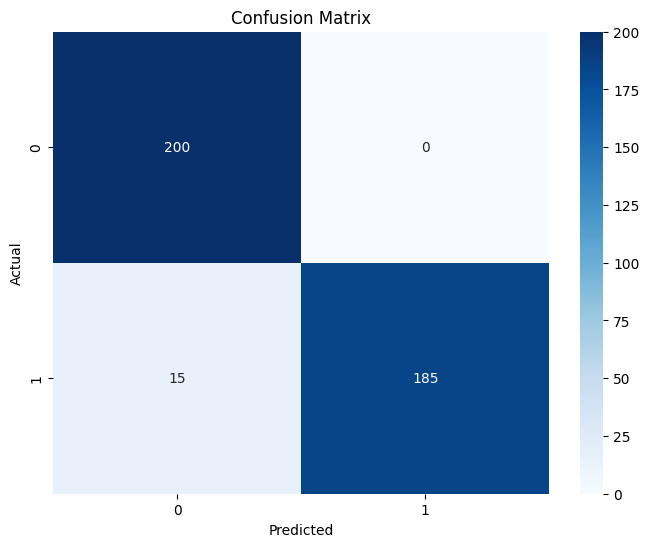

In [94]:
cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(true_classes, predicted_classes, target_names=['teens', 'twenties', 'thirties', 'fourties', 'fifties'])

print(report)

In [ ]:
def build_model_scratch_Hyperband(hp):
    model = Sequential()
    model.add(Rescaling(1./255))
    model.add(Conv2D(
            filters=hp.Int('conv_filters', min_value=32, max_value=256, step=32),
            kernel_size=hp.Choice('conv_kernel_size', values=[3, 5]),
            activation='relu',
            input_shape=(224, 224, 3),
            kernel_regularizer=l2(0.001) 
        ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu',
            kernel_regularizer=l2(0.001)
        ))
    model.add(Dense(1, activation='sigmoid'))
    
  
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  
    return model

In [ ]:
from keras_tuner import Hyperband

tuner = Hyperband(
    build_model_scratch_Hyperband,
    objective='val_accuracy',
    max_epochs=5,  # Maximum number of epochs to train one model
    factor=3,  # Reduction factor for the number of epochs and number of models for each bracket
)

# Start the search for the best hyperparameter configuration.
tuner.search(trainSet, epochs=10, validation_data=valSet, callbacks=[early_stopping_cb])

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Display the model's architecture
best_model.summary()

In [112]:
test_predictions = []
test_labels = []

for images, labels in DemoSet:
    batch_predictions = model.predict(images)
    batch_predictions = (batch_predictions > 0.5).astype('int32')
    test_predictions.extend(batch_predictions)
    test_labels.extend(labels.numpy())

test_predictions = np.array(test_predictions)
test_labels = np.array(test_labels)

1/1 [==============================] - 0s 149ms/step


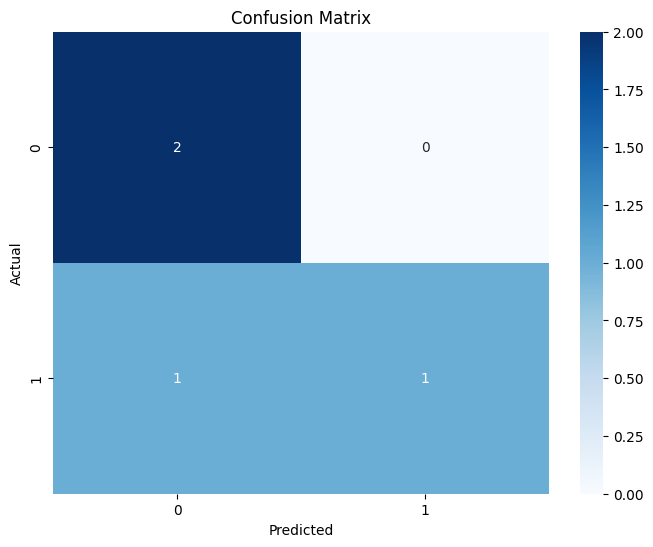

In [113]:
cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [125]:
for images, labels in DemoSet:
    score = model.predict(images)
    predictions = (score > 0.5).astype('int32')

    print(f"Sample: Predicted Class=\n{predictions}, \nActual Class={labels.numpy()}, \nScore=\n{score}")

1/1 [==============================] - 0s 216ms/step
Sample: Predicted Class=
[[0]
 [1]
 [0]
 [0]], 
Actual Class=[0 1 1 0], 
Score=
[[7.094905e-12]
 [9.996124e-01]
 [5.257754e-03]
 [6.609362e-11]]
